# Principal Component Analysis

 Principal Component Analysis is basically a statistical procedure to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables. 

Each of the principal components is chosen in such a way that it would describe most of them still available variance and all these principal components are orthogonal to each other. In all principal components, first principal component has a maximum variance.

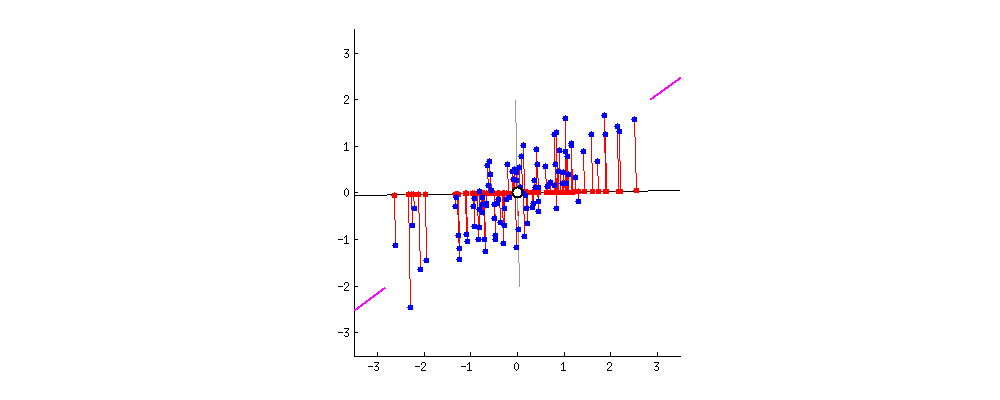

## Uses of PCA: 

1. It is used to find interrelations between variables in the data.
2. It is used to interpret and visualize data.
3. The number of variables is decreasing which makes further analysis simpler.
4. It’s often used to visualize genetic distance and relatedness between populations.

These are basically performed on a square symmetric matrix. It can be a pure sums of squares and cross-products matrix Covariance matrix or Correlation matrix. A correlation matrix is used if the individual variance differs much.

# Objectives of PCA: 

1. It is basically a non-dependent procedure in which it reduces attribute space from a large number of variables to a smaller number of factors.

2. PCA is basically a dimension reduction process but there is no guarantee that the dimension is interpretable.

3. The main task in this PCA is to select a subset of variables from a larger set, based on which original variables have the highest correlation with the principal amount.

4. Identifying patterns: PCA can help identify patterns or relationships between variables that may not be apparent in the original data. By reducing the dimensionality of the data, PCA can reveal underlying structures that can be useful in understanding and interpreting the data.

5. Feature extraction: PCA can be used to extract features from a set of variables that are more informative or relevant than the original variables. These features can then be used in modeling or other analysis tasks.

6. Data compression: PCA can be used to compress large datasets by reducing the number of variables needed to represent the data, while retaining as much information as possible.

7. Noise reduction: PCA can be used to reduce the noise in a dataset by identifying and removing the principal components that correspond to the noisy parts of the data.

8. Visualization: PCA can be used to visualize high-dimensional data in a lower-dimensional space, making it easier to interpret and understand. By projecting the data onto the principal components, patterns and relationships between variables can be more easily visualized.

Principal Axis Method: PCA basically searches a linear combination of variables so that we can extract maximum variance from the variables. Once this process completes it removes it and searches for another linear combination that gives an explanation about the maximum proportion of remaining variance which basically leads to orthogonal factors. In this method, we analyze total variance.

Eigenvector: It is a non-zero vector that stays parallel after matrix multiplication. Let’s suppose x is an eigenvector of dimension r of matrix M with dimension r*r if Mx and x are parallel. Then we need to solve Mx=Ax where both x and A are unknown to get eigenvector and eigenvalues. 

Under Eigen-Vectors, we can say that Principal components show both common and unique variance of the variable. Basically, it is variance focused approach seeking to reproduce total variance and correlation with all components. The principal components are basically the linear combinations of the original variables weighted by their contribution to explain the variance in a particular orthogonal dimension.

Eigen Values: It is basically known as characteristic roots. It basically measures the variance in all variables which is accounted for by that factor. The ratio of eigenvalues is the ratio of explanatory importance of the factors with respect to the variables. If the factor is low then it is contributing less to the explanation of variables. In simple words, it measures the amount of variance in the total given database accounted by the factor. We can calculate the factor’s eigenvalue as the sum of its squared factor loading for all the variables.

In [23]:

from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
# calculate the mean of each column
M = mean(A.T, axis=1)
print(M)
# center columns by subtracting column means
C = A - M
print(C)
# calculate covariance matrix of centered matrix
V = cov(C.T)
print(V)
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[1 2]
 [3 4]
 [5 6]]
[3. 4.]
[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]
[[4. 4.]
 [4. 4.]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[8. 0.]
[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


# Reusable Principal Component Analysis

We can calculate a Principal Component Analysis on a dataset using the PCA() class in the scikit-learn library. The benefit of this approach is that once the projection is calculated, it can be applied to new data again and again quite easily.

When creating the class, the number of components can be specified as a parameter.

The class is first fit on a dataset by calling the fit() function, and then the original dataset or other data can be projected into a subspace with the chosen number of dimensions by calling the transform() function.

Once fit, the eigenvalues and principal components can be accessed on the PCA class via the explained_variance_ and components_ attributes.

The example below demonstrates using this class by first creating an instance, fitting it on a 3×2 matrix, accessing the values and vectors of the projection, and transforming the original data.

In [24]:

# Principal Component Analysis
from numpy import array
from sklearn.decomposition import PCA
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
# create the PCA instance
pca = PCA(2)
# fit on data
pca.fit(A)
# access values and vectors
print(pca.components_)
print(pca.explained_variance_)
# transform data
B = pca.transform(A)
print(B)

[[1 2]
 [3 4]
 [5 6]]
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
[8.00000000e+00 2.25080839e-33]
[[-2.82842712e+00  2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00 -2.22044605e-16]]


In [1]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# importing or loading the dataset
dataset = pd.read_csv('wine.csv')
 
# distributing the dataset into two components X and Y
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [3]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

 Feature Scaling

In [4]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [6]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [7]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)

In [8]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


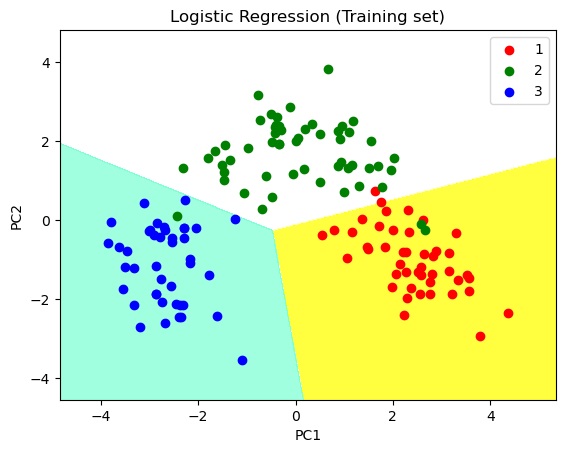

In [9]:
# Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap
 
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
 
# show scatter plot
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


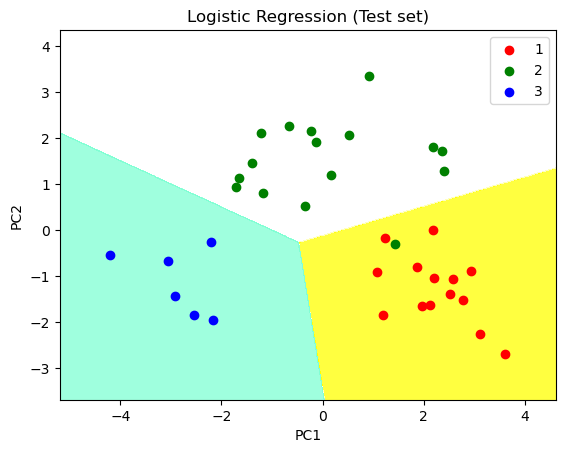

In [10]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap
 
X_set, y_set = X_test, y_test
 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()
 
# show scatter plot
plt.show()

In [13]:
from sklearn.datasets import load_wine
winedata = load_wine()
X, y = winedata['data'], winedata['target']
print(X.shape)
print(y.shape)

(178, 13)
(178,)


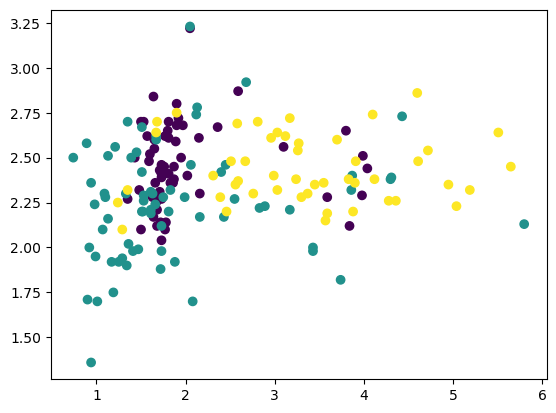

In [14]:
...
import matplotlib.pyplot as plt
plt.scatter(X[:,1], X[:,2], c=y)
plt.show()

In [17]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt



In [18]:
# Load dataset
winedata = load_wine()
X, y = winedata['data'], winedata['target']
print("X shape:", X.shape)
print("y shape:", y.shape)



X shape: (178, 13)
y shape: (178,)


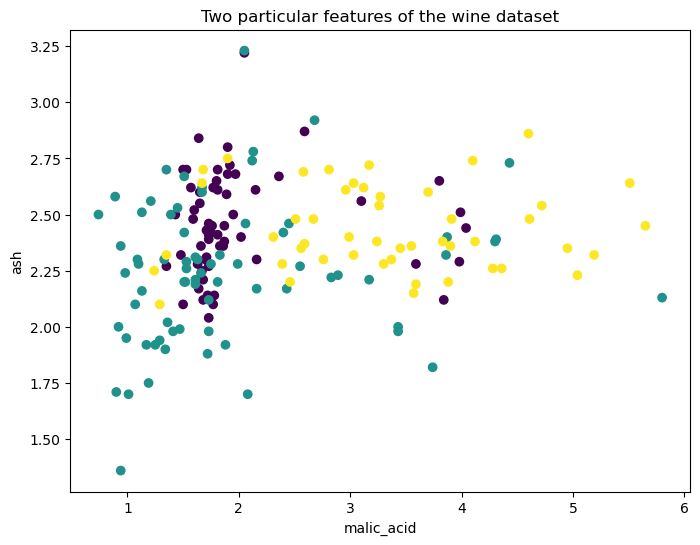

In [19]:
# Show any two features
plt.figure(figsize=(8,6))
plt.scatter(X[:,1], X[:,2], c=y)
plt.xlabel(winedata["feature_names"][1])
plt.ylabel(winedata["feature_names"][2])
plt.title("Two particular features of the wine dataset")
plt.show()



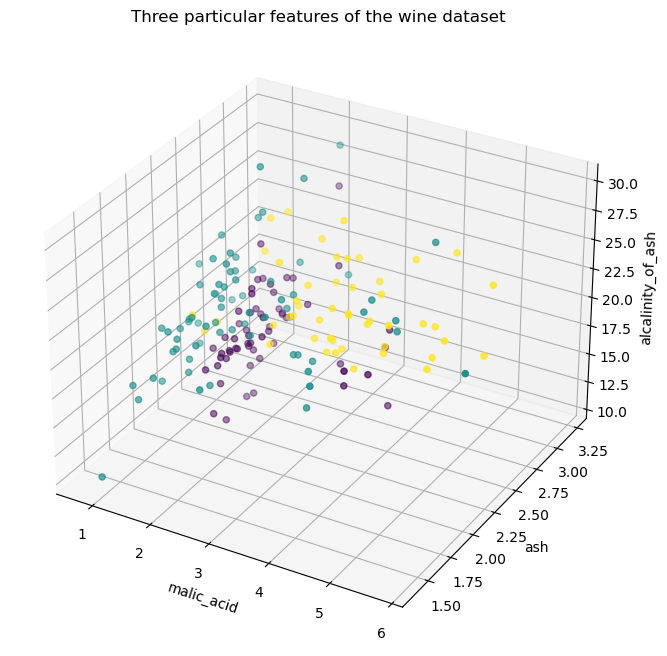

In [20]:
# Show any three features
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,1], X[:,2], X[:,3], c=y)
ax.set_xlabel(winedata["feature_names"][1])
ax.set_ylabel(winedata["feature_names"][2])
ax.set_zlabel(winedata["feature_names"][3])
ax.set_title("Three particular features of the wine dataset")
plt.show()



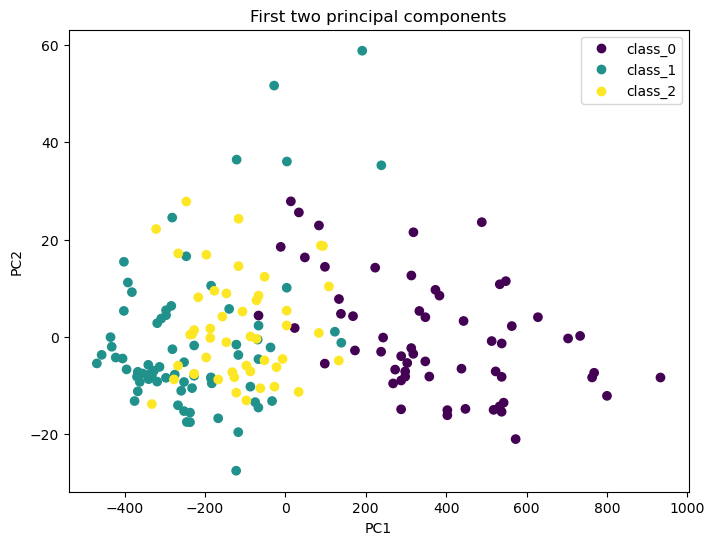

In [21]:
# Show first two principal components without scaler
pca = PCA()
plt.figure(figsize=(8,6))
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components")
plt.show()



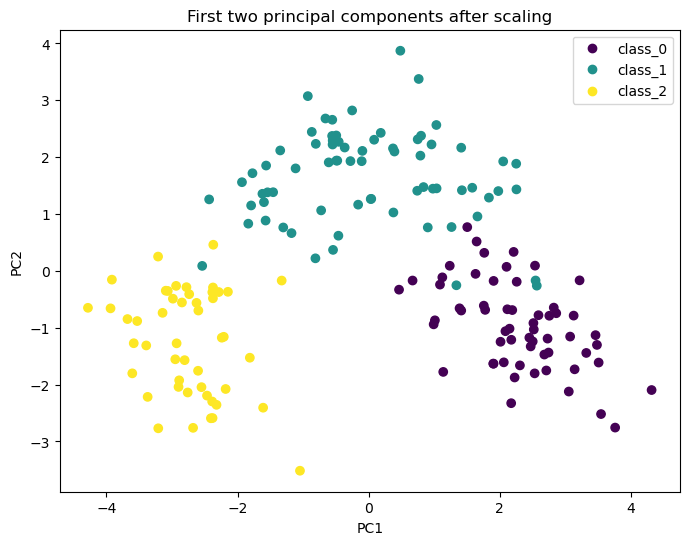

In [22]:
# Show first two principal components with scaler
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components after scaling")
plt.show()